# Aplicación de la regresión lineal múltiple  usando gradiente descendente y gradiente descendente estocástico

**Nombre** : Rasshid Ortiz Rodríguez

En este Notebook se mostrará una aplicación de la regresión lineal múltiple usando gradiente descendente y gradiente descendente estocástico, este último usando 2 versiones. La implementación es propia.

## Conjunto de datos

El conjunto de datos de Kaggle sobre los juegos de Google Play es una recopilación de información con más de 2M de datos sobre aplicaciones de juegos disponibles en Google Play Store. Este dataset ofrece detalles esenciales que permiten realizar un análisis exhaustivo sobre las aplicaciones de juegos, incluyendo aspectos como popularidad, rentabilidad y características técnicas. A continuación se describen algunos de los principales atributos que suelen encontrarse en este conjunto de datos:

+ App: El nombre de la aplicación o juego.
+ Category: La categoría bajo la cual se clasifica el juego, como "Action", "Puzzle", "Casual", etc.
+ Rating: La calificación promedio dada por los usuarios, usualmente en una escala de 1 a 5 estrellas.
+ Reviews: El número total de reseñas que los usuarios han dejado sobre la aplicación.
+ Size: El tamaño de la aplicación en megabytes. Algunos valores pueden estar etiquetados como "Varies with device".
+ Installs: El número aproximado de instalaciones que ha tenido la aplicación, generalmente representado en intervalos como "10,000+", "1,000,000+", etc.
+ Type: Indica si la aplicación es gratuita ("Free") o de pago ("Paid").
+ Price: El precio de la aplicación si es de pago. Las aplicaciones gratuitas suelen tener un valor de 0.
+ Content Rating: La clasificación de contenido, que indica la adecuación de la aplicación para diferentes grupos de edad, como "Everyone", "Teen", "Mature 17+", etc.
+ Genres: Los géneros a los que pertenece el juego, que pueden ser múltiples.
+ Last Updated: La última fecha en la que la aplicación fue actualizada.
+ Current Version: La versión actual de la aplicación.
+ Android Version: La versión mínima de Android requerida para instalar la aplicación. \\
Este conjunto de datos contiene 23 carácterísticas sobre aplicaciones y es útil para análisis de mercado, estudios de popularidad, tendencias de juegos móviles y otros análisis de datos relacionados con la industria de las aplicaciones móviles.

Importar librerías y drive

In [1]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cargar el conjunto de datos y visualizar data frame

In [3]:
# Cargar el archivo CSV en un DataFrame
df_gp= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Temas_selectos_computacion/Google-Playstore.csv')
# Mostrar las primeras filas del DataFrame
df_gp.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [4]:
#tamaño
df_gp.shape

(2312944, 24)

In [5]:
#info del data frame
df_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

Para efectos prácticas eliminaremos las columnas cuyo tipo de dato sea "objeto", esto porque el mapeado de dichas etiquetas categóricas no es sencillo.

In [6]:
#Eliminar las columnas en las que el tipo de dato es objeto
df_gp = df_gp.select_dtypes(exclude=['object'])

Nueva visualización de los datos

In [7]:
df_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Rating            float64
 1   Rating Count      float64
 2   Minimum Installs  float64
 3   Maximum Installs  int64  
 4   Free              bool   
 5   Price             float64
 6   Ad Supported      bool   
 7   In App Purchases  bool   
 8   Editors Choice    bool   
dtypes: bool(4), float64(4), int64(1)
memory usage: 97.1 MB


Ahora mapearemos los que tienen etiquetas booleanas

In [8]:
#Convertir las columnas con valores booleanos a etiquetas numéricas enteras
df_gp['Ad Supported'] = df_gp['Ad Supported'].astype(int)
df_gp['In App Purchases'] = df_gp['In App Purchases'].astype(int)
df_gp['Free'] = df_gp['Free'].astype(int)
df_gp['Editors Choice'] = df_gp['Editors Choice'].astype(int)

Visualización del data frame con el que trabajaremos

In [9]:
df_gp.head()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
0,0.0,0.0,10.0,15,1,0.0,0,0,0
1,4.4,64.0,5000.0,7662,1,0.0,1,0,0
2,0.0,0.0,50.0,58,1,0.0,0,0,0
3,5.0,5.0,10.0,19,1,0.0,1,0,0
4,0.0,0.0,100.0,478,1,0.0,0,0,0


In [10]:
# df describe
df_gp.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Ad Supported,In App Purchases,Editors Choice
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06,2.312944e+06,2.312944e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,9.805149e-01,1.034992e-01,4.975365e-01,8.444173e-02,3.687941e-04
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,1.382225e-01,2.633127e+00,4.999940e-01,2.780492e-01,1.920047e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,1.000000e+00,4.000000e+02,1.000000e+00,1.000000e+00,1.000000e+00


Construcción del mapa de calor

<Axes: >

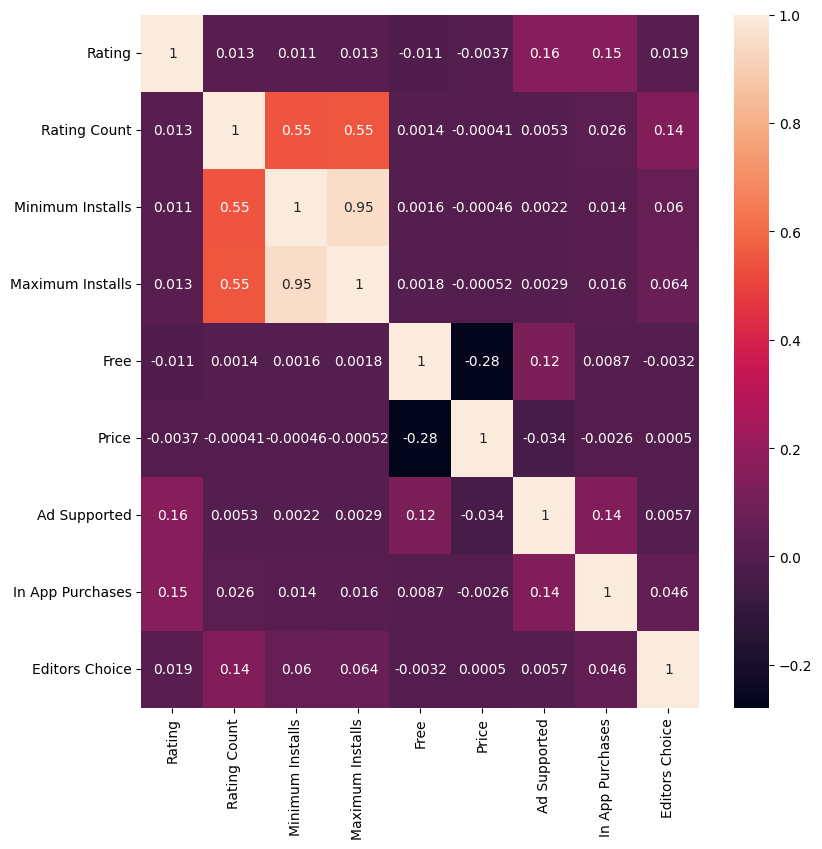

In [11]:
# visualización de la correlación mediante un mapa de calor
plt.figure(figsize=(9,9))
sns.heatmap(df_gp.corr(),annot=True)

Intentaremos predecir el rating usando nuestro modelo de regresión múltiple, dado que ninguna característica tiene una alta correlación con el rating, intentaremos apoyarnos de todas las variables si la eficiencia computacional nos lo permit y analizaremos los resultados

## Selección y separación de los datos

In [12]:
# Tomaremos a X con los valores de todas las columnas excepto rating, la cual será los valores para y
X=df_gp[["Rating Count","Minimum Installs","Maximum Installs","Free","Price","Ad Supported","In App Purchases","Editors Choice"]].values
y=df_gp["Rating"].values

In [13]:
X,y

(array([[0.000e+00, 1.000e+01, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [6.400e+01, 5.000e+03, 7.662e+03, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 5.000e+01, 5.800e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [0.000e+00, 1.000e+02, 2.020e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [8.000e+00, 1.000e+03, 2.635e+03, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        [1.200e+01, 1.000e+02, 3.540e+02, ..., 1.000e+00, 0.000e+00,
         0.000e+00]]),
 array([0. , 4.4, 0. , ..., 0. , 3.5, 5. ]))

Ahora estandarizaremos los datos

In [14]:
#Normalizar los datos
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [15]:
X_std

array([[-0.01350304, -0.01212279, -0.01359318, ..., -0.99508502,
        -0.30369355, -0.01920755],
       [-0.01320138, -0.01179301, -0.01326854, ...,  1.00493925,
        -0.30369355, -0.01920755],
       [-0.01350304, -0.01212015, -0.01359136, ..., -0.99508502,
        -0.30369355, -0.01920755],
       ...,
       [-0.01350304, -0.01211684, -0.01358524, ..., -0.99508502,
        -0.30369355, -0.01920755],
       [-0.01346533, -0.01205736, -0.01348195, ...,  1.00493925,
        -0.30369355, -0.01920755],
       [-0.01344648, -0.01211684, -0.01357879, ...,  1.00493925,
        -0.30369355, -0.01920755]])

In [16]:
#Separación de los datos en conjuntos de prueba y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1850355, 8), (462589, 8), (1850355,), (462589,))

In [18]:
X_train, y_train

(array([[-0.01342763, -0.01205736, -0.0134299 , ..., -0.99508502,
         -0.30369355, -0.01920755],
        [-0.01345119, -0.01205736, -0.01354402, ..., -0.99508502,
         -0.30369355, -0.01920755],
        [-0.01350304, -0.01212015, -0.0135911 , ..., -0.99508502,
         -0.30369355, -0.01920755],
        ...,
        [-0.01281017, -0.01146257, -0.01275204, ...,  1.00493925,
          3.29279296, -0.01920755],
        [-0.01350304, -0.01211684, -0.01358435, ..., -0.99508502,
         -0.30369355, -0.01920755],
        [-0.01350304, -0.01205736, -0.01346565, ...,  1.00493925,
         -0.30369355, -0.01920755]]),
 array([1.8, 3.7, 0. , ..., 3.1, 0. , 0. ]))

## Funciones

Funciones para efectuar una regresión lineal múltiple usando descenso del gradiente

In [19]:
# función que calcula un valor para "y" basado en los pesos "w"
def predict_mul(X, w):
  y_pred = np.dot(X,w[1:]) +  w[0]
  return y_pred
# función que calcula los valores de la función de costo J BASADO EN EL MSE (mean square error)
def cost(X, y, w):
    y_pred = predict_mul(X, w)
    error = (y - y_pred)**2
    loss = np.mean(error)
    return loss
# método del gradiente descendente múltiple
def gradient(X, y, w, alpha, epochs):
  costos = np.zeros(epochs)
  n = len(X) # cantidad de datos
  for k in range(epochs):
    # calcular el valor de la predicción
    y_pred = predict_mul(X, w)
    # gradientes: derivadas de la función de error
    error = (y - y_pred)
    dw_0 = -(2/n) * np.sum(error) # dJ/d w_0
    dw_j = -(2/n) * np.dot(X.T,error) # dJ/d w_1
    # actualizar los pesos usando el gradiente descendente
    w[0] = w[0] - alpha * dw_0
    w[1:] = w[1:] - alpha*dw_j
    # actualizar el valor del costo
    costos[k] = cost(X, y, w)
  return w, costos, k+1

Funciones que efectuan regresión lineal múltiple usando gradiente descendente versión 1

In [20]:
#funcion que separa en lotes a X e y
def lote_X_y(X,y,n,size=1):
      if size > n:
             size=n
      idx=np.random.choice(n,size,replace=False)
      return size, X[idx],y[idx]
# método del gradiente descendente versión estocástica
def gradient_estochastic(X, y, w, alpha, size, epochs):
    costos = np.zeros(epochs)
    n = len(X)                               # cantidad de datos
    for k in range(epochs):
        # seleccionar un lote de datos
        n_batch, lote_x, lote_y = lote_X_y(X, y, n, size)
        # calcular el valor de la predicción
        y_pred = predict_mul(lote_x, w)

        # gradientes: derivadas de la función de error
        error = (lote_y - y_pred)
        dw_0 = -(2/n_batch) * np.sum(error)         # dJ/d w_0
        dw_j = -(2/n_batch) * np.dot(lote_x.T,error)       # dJ/d w_1

        # actualizar los pesos usando el gradiente descendente
        w[0] = w[0] - alpha * dw_0
        w[1:] = w[1:] - alpha*dw_j

        # actualizar el valor del costo
        costos[k] = cost(X, y, w)
    return w, costos, k+1

Funciones que efectúan una regresión lineal múltiple usando descenso del gradiente versión 2

In [21]:
def getBatch(len_x, batch_size):
  idx=np.arange(len_x)
  #revolver índices
  np.random.shuffle(idx)
  return len_x//batch_size, idx
# método del gradiente descendente múltiple
def gradient_estoch_new(X, y, w, alpha, epochs,num_batch):
  costos = np.zeros(epochs)
  n = len(X) # cantidad de datos
  batch_size,idx=getBatch(n, num_batch)
  #ciclo para las épocas
  for k in range(epochs):
    #ciclo para los lotes
    for i in range(num_batch):
        X_batch=X[i*batch_size:(i+1)*batch_size]
        y_batch=y[i*batch_size:(i+1)*batch_size]
        # calcular el valor de la predicción
        y_pred = predict_mul(X_batch, w)
        # gradientes: derivadas de la función de error
        error = (y_batch - y_pred)
        dw_0 = -(2/batch_size) * np.sum(error) # dJ/d w_0
        dw_j = -(2/batch_size) * np.dot(X_batch.T,error) # dJ/d w_1
        # actualizar los pesos usando el gradiente descendente
        w[0] = w[0] - alpha * dw_0
        w[1:] = w[1:] - alpha*dw_j
    # actualizar el valor del costo
    costos[k] = cost(X, y, w)
  return w, costos, k+1

## Regresión lineal múltiple usando gradiente descendente

Establecer parámetros

In [22]:
#establecer parámetros
epochs = 1000
alpha = 0.001
#inicializamos los pesos
rgen = np.random.RandomState(60)
w0 = rgen.normal(loc=0.0, scale=0.01,size=1 + X_train.shape[1])
w0

array([-9.21770993e-03, -5.86317634e-03,  1.16399914e-02, -1.24172396e-02,
       -1.98523022e-02,  1.30670891e-02,  7.37807059e-03,  3.79111282e-03,
        9.89200864e-06])

In [23]:
# eliminar 18292 valores nan  en X_train, y_train
X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]

In [24]:
#Hacer lo mismo para el conjunto de entrenamiento
X_test = X_test[~np.isnan(y_test)]
y_test = y_test[~np.isnan(y_test)]

In [25]:
# calcular cuantos valores nan hay
np.isnan(X_train).sum(), np.isnan(y_train).sum()

(0, 0)

In [26]:
w,loss,k=gradient(X_train, y_train, w0, alpha, epochs)

In [27]:
loss,w

(array([9.30383012, 9.28346745, 9.26318678, 9.2429878 , 9.22287018,
        9.20283358, 9.18287767, 9.16300214, 9.14320666, 9.1234909 ,
        9.10385455, 9.08429727, 9.06481876, 9.0454187 , 9.02609676,
        9.00685263, 8.98768601, 8.96859656, 8.949584  , 8.93064799,
        8.91178824, 8.89300444, 8.87429628, 8.85566345, 8.83710565,
        8.81862258, 8.80021394, 8.78187942, 8.76361873, 8.74543157,
        8.72731764, 8.70927664, 8.69130829, 8.67341228, 8.65558833,
        8.63783615, 8.62015544, 8.60254592, 8.5850073 , 8.5675393 ,
        8.55014162, 8.53281399, 8.51555612, 8.49836774, 8.48124855,
        8.46419829, 8.44721666, 8.43030341, 8.41345824, 8.3966809 ,
        8.37997109, 8.36332855, 8.34675301, 8.3302442 , 8.31380184,
        8.29742568, 8.28111544, 8.26487086, 8.24869167, 8.23257761,
        8.21652841, 8.20054382, 8.18462357, 8.1687674 , 8.15297506,
        8.13724629, 8.12158083, 8.10597843, 8.09043882, 8.07496177,
        8.05954701, 8.0441943 , 8.02890338, 8.01

Imprimir costo mínimo

In [28]:
#costo mínimo
print(loss.min())

4.330602835004981


Graficar

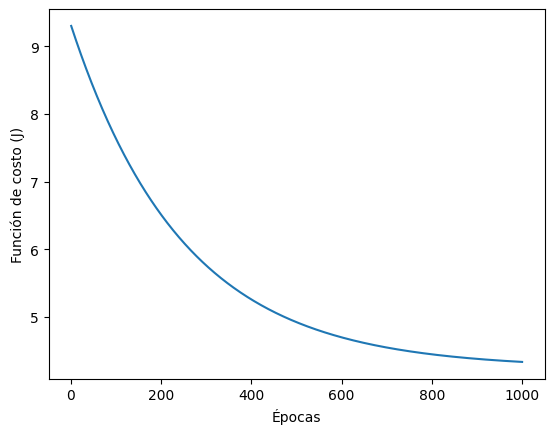

In [29]:
# graficar función de costo vs número de iteraciones
plt.plot(range(1, k+1), loss[:k])
plt.ylabel('Función de costo (J)')
plt.xlabel('Épocas')
plt.show()

Predicciones

In [30]:
# hacer las predicciones
y_pred = predict_mul(X_test, w)

In [31]:
y_pred

array([1.54681042, 2.45367525, 2.09562092, ..., 2.09572454, 3.00247682,
       1.54681055])

In [32]:
#Evaluación
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.02491490193935053


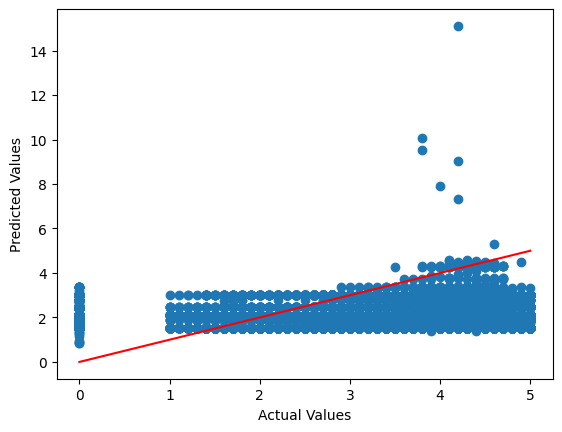

In [33]:
# gráfico de valores verdaderos vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de identidad
plt.show()

## Gradiente descendente estocástico version 1

In [34]:
#establecer parámetros
epochs = 1000
alpha = 0.001
size=100
#inicializamos los pesos
rgen = np.random.RandomState(60)
w0 = rgen.normal(loc=0.0, scale=0.01,size=1 + X_train.shape[1])
w0

array([-9.21770993e-03, -5.86317634e-03,  1.16399914e-02, -1.24172396e-02,
       -1.98523022e-02,  1.30670891e-02,  7.37807059e-03,  3.79111282e-03,
        9.89200864e-06])

In [35]:
w,loss,k=gradient_estochastic(X_train, y_train, w0, alpha, size, epochs)

In [36]:
#costo mínimo
print(loss.min())

4.329015399778398


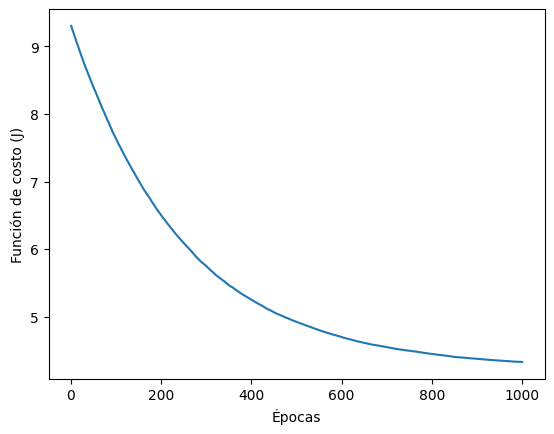

In [37]:
# graficar función de costo vs número de iteraciones
plt.plot(range(1, k+1), loss[:k])
plt.ylabel('Función de costo (J)')
plt.xlabel('Épocas')
plt.show()

In [38]:
# hacer las predicciones
y_pred = predict_mul(X_test, w)

In [39]:
y_pred

array([1.55241956, 2.45650463, 2.10092808, ..., 2.10120728, 3.00499187,
       1.55242006])

In [40]:
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.02474021788652314


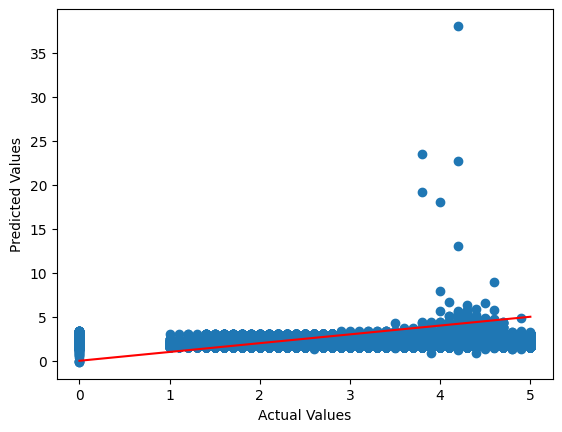

In [41]:
# gráfico de valores verdaderos vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de identidad
plt.show()

## Gradiente descendente estocásatico  versión 2

In [42]:
X=df_gp[["Ad Supported","In App Purchases"]].values

In [48]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [49]:
X_std = X_std[~np.isnan(y)]
y = y[~np.isnan(y)]

In [50]:
X_std.shape,y.shape

((2290061, 2), (2290061,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [52]:
#establecer parámetros
epochs = 1000
alpha = 0.001
num_batch=10
#inicializamos los pesos
rgen = np.random.RandomState(60)
w0 = rgen.normal(loc=0.0, scale=0.01,size=1 + X_train.shape[1])
w0

array([-0.00921771, -0.00586318,  0.01163999])

In [53]:
w,loss,k=gradient_estoch_new(X_train, y_train, w0, alpha, epochs,num_batch)

In [54]:
#costo minimo
print(loss.min())

4.244423897064615


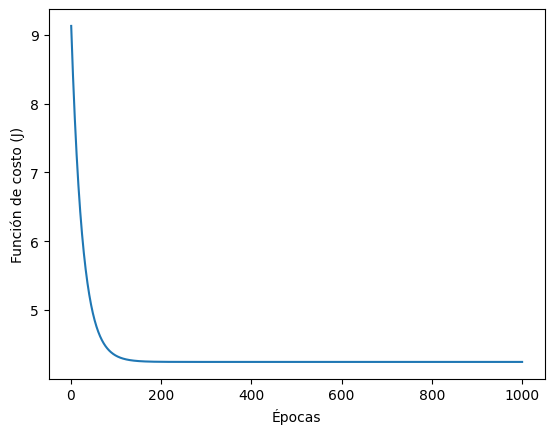

In [55]:
# graficar función de costo vs número de iteraciones
plt.plot(range(1, k+1), loss[:k])
plt.ylabel('Función de costo (J)')
plt.xlabel('Épocas')
plt.show()

In [56]:
# hacer las predicciones
y_pred = predict_mul(X_test, w)

In [57]:
y_pred

array([1.81979759, 1.81979759, 2.41603948, ..., 1.81979759, 3.43536742,
       1.81979759])

In [58]:
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.043963481636740576


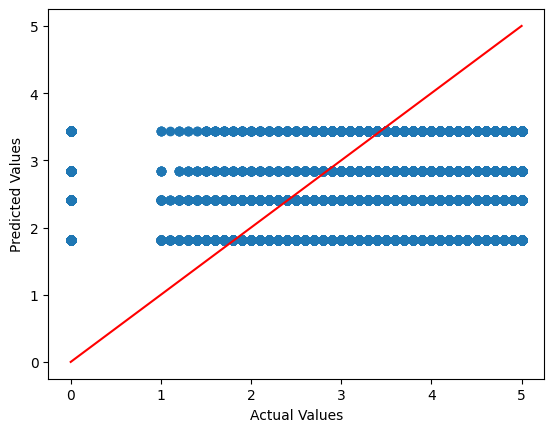

In [59]:
# gráfico de valores verdaderos vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de identidad
plt.show()

## Validacion cruzada

In [64]:
#funcion para obtener lotes del mismo tamaño
def getFolders(len_x, num_folder):
  idx=np.arange(len_x)
  #revolver índices
  np.random.shuffle(idx)
  size_folder=len_x//num_folder
  return size_folder, idx
from sklearn.metrics import accuracy_score, r2_score
#funcion de validación cruzada
def cross_validation(X, y, num_folder,fmodel,w0,alpha,epochs,num_batch):
  size, idx=getFolders(len(X), num_folder)
  score=np.zeros(num_folder)
  for k in range(num_folder):
    #separar datos
    X_test=X[idx[k*size:(k+1)*size]]
    y_test=y[idx[k*size:(k+1)*size]]
    X_train=np.delete(X, idx[k*size:(k+1)*size], axis=0)
    y_train=np.delete(y, idx[k*size:(k+1)*size], axis=0)
    #aplicar modelo
    w,loss,_=fmodel(X_train, y_train, w0, alpha, epochs,num_batch)
    # Predicciones y evaluación
    if np.all(y == y.astype(int)):
      y_pred=predict(X_test, w)
      score[k]=accuracy_score(y_test, y_pred)
    else:
      y_pred=predict_mul(X_test, w)
      score[k]=r2_score(y_test, y_pred)
  return np.mean(score)

In [65]:
score=cross_validation(X_std, y, 10,gradient_estoch_new,w0,alpha,epochs,num_batch)
print(score)

0.04344793667118365
